In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('imdb_top250movies.csv')

In [122]:
df.columns

Index(['Unnamed: 0', 'name', 'release_year', 'length', 'movie_rate', 'rating'], dtype='object')

In [123]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [124]:
df.shape

(250, 5)

In [125]:
df.columns

Index(['name', 'release_year', 'length', 'movie_rate', 'rating'], dtype='object')

In [126]:
df.head()

,name,release_year,length,movie_rate,rating
0,1. The Shawshank Redemption,1994,2h 22m,R,9.3 (2.9M)
1,2. The Godfather,1972,2h 55m,R,9.2 (2M)
2,3. The Dark Knight,2008,2h 32m,PG-13,9.0 (2.8M)
3,4. The Godfather Part II,1974,3h 22m,R,9.0 (1.4M)
4,5. 12 Angry Men,1957,1h 36m,Approved,9.0 (857K)


In [127]:
#seperate rating and reviewers. Ex -  9.3 and 2.9M in seperate columns
df[['ratingOutOfTen','reviewers']] = df['rating'].str.split('(',expand=True)
df[['reviewers']] = df['reviewers'].str.replace(')','')
del df['rating']

In [128]:
df

,name,release_year,length,movie_rate,ratingOutOfTen,reviewers
0,1. The Shawshank Redemption,1994,2h 22m,R,9.3,2.9M
1,2. The Godfather,1972,2h 55m,R,9.2,2M
2,3. The Dark Knight,2008,2h 32m,PG-13,9.0,2.8M
3,4. The Godfather Part II,1974,3h 22m,R,9.0,1.4M
4,5. 12 Angry Men,1957,1h 36m,Approved,9.0,857K
...,...,...,...,...,...,...
245,246. The Iron Giant,1999,1h 26m,PG,8.1,225K
246,247. The Help,2011,2h 26m,PG-13,8.1,490K
247,248. It Happened One Night,1934,1h 45m,Passed,8.1,112K
248,249. The 400 Blows,1959,1h 39m,Not Rated,8.1,127K


In [129]:
df['reviewers'] = (
    df.reviewers.str.replace(',','')
        .str.replace('\s*M', 'e6')
        .str.replace('\s*K', 'e3')
        .astype(float)
)

In [130]:
# remove serial numbers from movie names
df['name'] = df['name'].str.replace(r'^\d+\.\s*', '', regex=True)
df

,name,release_year,length,movie_rate,ratingOutOfTen,reviewers
0,The Shawshank Redemption,1994,2h 22m,R,9.3,2900000.0
1,The Godfather,1972,2h 55m,R,9.2,2000000.0
2,The Dark Knight,2008,2h 32m,PG-13,9.0,2800000.0
3,The Godfather Part II,1974,3h 22m,R,9.0,1400000.0
4,12 Angry Men,1957,1h 36m,Approved,9.0,857000.0
...,...,...,...,...,...,...
245,The Iron Giant,1999,1h 26m,PG,8.1,225000.0
246,The Help,2011,2h 26m,PG-13,8.1,490000.0
247,It Happened One Night,1934,1h 45m,Passed,8.1,112000.0
248,The 400 Blows,1959,1h 39m,Not Rated,8.1,127000.0


In [131]:
# count na values if any in all columns
df.isna().sum()

name              0
release_year      0
length            0
movie_rate        2
ratingOutOfTen    0
reviewers         0
dtype: int64

In [132]:
# fill in na values with mode of the movie_rate column
df.fillna(df['movie_rate'].mode()[0], inplace = True)

In [133]:
# check if na is 0
df.isna().sum()

name              0
release_year      0
length            0
movie_rate        0
ratingOutOfTen    0
reviewers         0
dtype: int64

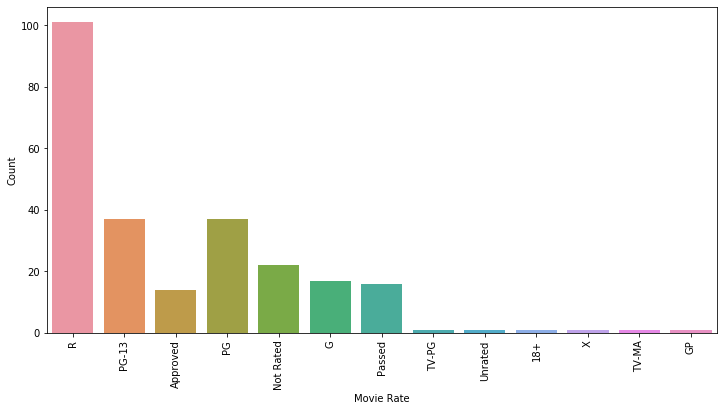

In [134]:
#data avisualization - countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='movie_rate')
plt.xticks(rotation=90)
plt.xlabel('Movie Rate')
plt.ylabel('Count')
plt.show()

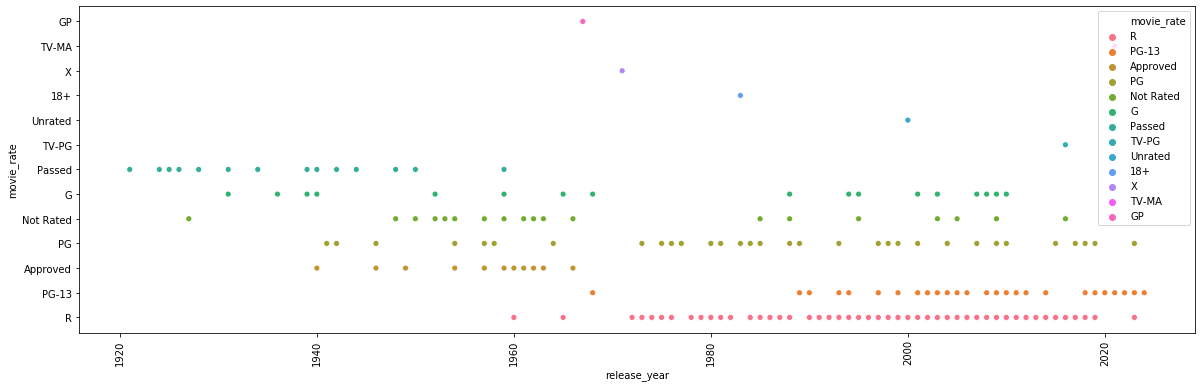

In [135]:
#scatterplot
plt.figure(figsize=(20,6))
x_values = df['release_year']
y_values = df['movie_rate']
sns.scatterplot(x=x_values, y=y_values, data=df, hue='movie_rate')
plt.xticks(rotation=90)

plt.show()

In [136]:
# count the categories
countOfMovieRate = pd.unique(df['movie_rate'])
countOfMovieRate

array(['R', 'PG-13', 'Approved', 'PG', 'Not Rated', 'G', 'Passed',
       'TV-PG', 'Unrated', '18+', 'X', 'TV-MA', 'GP'], dtype=object)

In [137]:
#data avisualization - countplot
# Label encoding for 'movie_rate' since it is a categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['movie_rate_encoded'] = label_encoder.fit_transform(df['movie_rate'])



,Year,Sum of Movies
0,1921,The Kid
1,1924,Sherlock Jr.
2,1925,The Gold Rush
3,1926,The General
4,1927,Metropolis
5,1928,The Passion of Joan of Arc
6,1931,City LightsM
7,1934,It Happened One Night
8,1936,Modern Times
9,1939,Gone with the WindMr. Smith Goes to Washington...


In [139]:
#top 20 movies by ratings
df_sorted = df.sort_values(by='ratingOutOfTen', ascending=False)
df_top_ten = df_sorted.head(20)

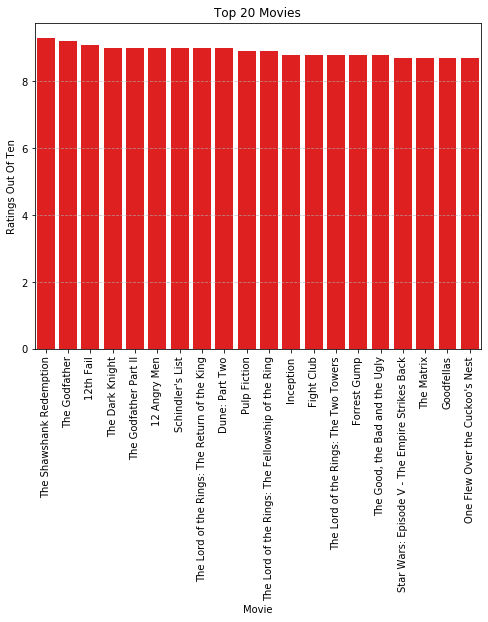

In [140]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_top_ten, x='name', y='ratingOutOfTen', color='red', )
plt.xlabel('Movie')
plt.ylabel('Ratings Out Of Ten')
plt.title('Top 20 Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

In [141]:
#top 10 movies by number or reviewers
df_sortedBy_reviewers = df.sort_values(by='reviewers', ascending=False)
df_sortedBy_reviewersTopTen = df_sortedBy_reviewers.head(10)
df_sortedBy_reviewersTopTen

,name,release_year,length,movie_rate,ratingOutOfTen,reviewers,movie_rate_encoded
0,The Shawshank Redemption,1994,2h 22m,R,9.3,2900000.0,8
2,The Dark Knight,2008,2h 32m,PG-13,9.0,2800000.0,6
14,Inception,2010,2h 28m,PG-13,8.8,2500000.0,6
13,Fight Club,1999,2h 19m,R,8.8,2300000.0,8
7,Pulp Fiction,1994,2h 34m,R,8.9,2200000.0,8
11,Forrest Gump,1994,2h 22m,PG-13,8.8,2200000.0,6
21,Interstellar,2014,2h 49m,PG-13,8.7,2100000.0,6
6,The Lord of the Rings: The Return of the King,2003,3h 21m,PG-13,9.0,2000000.0,6
8,The Lord of the Rings: The Fellowship of the Ring,2001,2h 58m,PG-13,8.9,2000000.0,6
16,The Matrix,1999,2h 16m,R,8.7,2000000.0,8


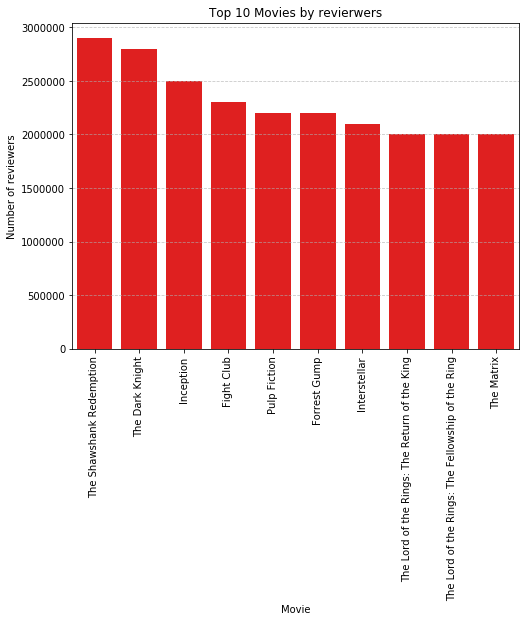

In [142]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_sortedBy_reviewersTopTen, x='name', y='reviewers', color='red', )
plt.xlabel('Movie')
plt.ylabel('Number of reviewers')
plt.title('Top 10 Movies by revierwers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

C:\Users\doshi\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


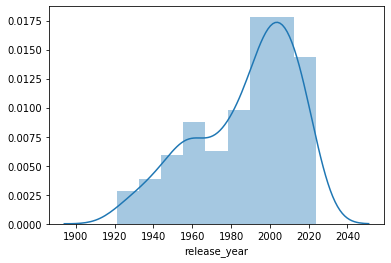

In [143]:
# distribution of movies released in years
sns.distplot(df['release_year'].astype(float))
